# Data integration

Let's merge both datasets into a single dataset containing every possible piece of information and analyse this merged dataset.

Following columns were added (extracted) in this notebook:
* class
* data from 2nd dataset - columns starting with: db_, updates_, faq_ and comments_

In [1]:
import mysql.connector as sql
import pandas as pd
import seaborn as sns

### First dataset - webrobots.io

In [2]:
df_projects = pd.read_csv('data/partly_analysed.csv', encoding='cp1252', index_col=0)

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Second dataset

In [3]:
con = sql.connect(database='kickstarter2017', user='kickstarter', password='kickstarter')

In [4]:
df_db = pd.read_sql('SELECT * FROM kickstarter2017.kickstarter_project WHERE status LIKE "failed" or status LIKE "successful"', con)
df_db.head()

,project_id,url,name,status,project_we_love,category_id,subcategory_id,creators_url,location_id,pledged,...,description_short,description_full,video_url,image_url,faq_count,updates_count,comments_count,fb_comments_count,fb_shares_count,project_data
0,7,https://www.kickstarter.com/projects/elenamoon...,You Down with YPP?,successful,0,1,1,https://www.kickstarter.com/projects/elenamoon...,7,1945.0,...,The Young Producers Project will work with you...,<p><b>WE DID IT! BUT LET'S KEEP GOING!</b> Tha...,https://ksr-video.imgix.net/projects/4694/vide...,https://ksr-ugc.imgix.net/assets/011/261/065/e...,0,3,3,0,0,"{""id"":1673627837,""photo"":{""key"":""assets/011/26..."
1,8,https://www.kickstarter.com/projects/146178436...,Season 6 of the Faroe Islands Podcast: The Out...,successful,0,1,1,https://www.kickstarter.com/projects/146178436...,8,2217.0,...,We&#39;re heading back to the Faroes to record...,"<p>We've made more than 200 episodes, but ther...",https://ksr-video.imgix.net/projects/952578/vi...,https://ksr-ugc.imgix.net/assets/011/684/575/e...,0,2,1,0,522,"{""id"":1984035314,""photo"":{""key"":""assets/011/68..."
2,9,https://www.kickstarter.com/projects/245752542...,refreshED,successful,0,1,1,https://www.kickstarter.com/projects/245752542...,10,544.0,...,refreshED is a podcast for those bold enough t...,<p>The Move:</p><p>Five years ago I embarked o...,,https://ksr-ugc.imgix.net/assets/011/729/694/c...,0,2,2,0,39,"{""id"":1613957923,""photo"":{""key"":""assets/011/72..."
3,10,https://www.kickstarter.com/projects/143081511...,I Want To Be Heard!,successful,0,1,1,https://www.kickstarter.com/projects/143081511...,11,510.0,...,My dream is to be a host. I would like to own ...,<p>I recently graduated college and my ultimat...,,https://ksr-ugc.imgix.net/assets/011/758/625/6...,0,0,1,0,4,"{""id"":1446980133,""photo"":{""key"":""assets/011/75..."
4,11,https://www.kickstarter.com/projects/786754763...,Latch Key Kids Podcast,successful,0,1,1,https://www.kickstarter.com/projects/786754763...,13,332.0,...,A podcast that relives and reviews cartoons of...,"<p>Hi, my name Timothy James Earls, but please...",,https://ksr-ugc.imgix.net/assets/011/745/304/3...,7,8,0,0,19,"{""id"":1805285154,""photo"":{""key"":""assets/011/74..."


In [5]:
df_db.tail()

,project_id,url,name,status,project_we_love,category_id,subcategory_id,creators_url,location_id,pledged,...,description_short,description_full,video_url,image_url,faq_count,updates_count,comments_count,fb_comments_count,fb_shares_count,project_data
108412,117020,https://www.kickstarter.com/projects/117359406...,Wm. Cofield Community and Celebration (October...,failed,0,14,145,https://www.kickstarter.com/projects/117359406...,2621,12503.0,...,"As our cheeses age to perfection, we are raisi...",<p>We are very pleased with our progress so fa...,https://ksr-video.imgix.net/projects/2945646/v...,,0,4,0,0,352,"{""id"":1250503860,""photo"":{""key"":""assets/016/50..."
108413,117021,https://www.kickstarter.com/projects/195679343...,Handcrafted Eco-Friendly Edible Spoon,failed,0,14,145,https://www.kickstarter.com/projects/195679343...,1611,192.0,...,"Using the 35 yr old Family Recipe on EDIBLES, ...","<div class=""template asset"" contenteditable=""f...",https://ksr-video.imgix.net/projects/3062569/v...,,0,0,0,0,0,"{""id"":303069932,""photo"":{""key"":""assets/017/846..."
108414,117022,https://www.kickstarter.com/projects/848839972...,Aura&#39;s Chocolate Bar | Small Batch Artisan...,failed,0,14,145,https://www.kickstarter.com/projects/848839972...,15,179.0,...,Chocolate lovers! Chocaholics! Let&#39;s Build...,<p><b>IN A NUTSHELL </b></p><p> Aura's Chocola...,https://ksr-video.imgix.net/projects/3058003/v...,,0,0,0,0,32,"{""id"":282994137,""photo"":{""key"":""assets/017/794..."
108415,117023,https://www.kickstarter.com/projects/100984525...,Japanese Lunch Box Retail Shop,failed,0,14,145,https://www.kickstarter.com/projects/100984525...,650,0.0,...,Setup our own food factory and a selling spot,<p>We will use the money on seting up a Food F...,,https://ksr-ugc.imgix.net/assets/017/864/128/f...,0,0,0,0,0,"{""id"":328068673,""photo"":{""key"":""assets/017/864..."
108416,117024,https://www.kickstarter.com/projects/556520025...,Original 90s Style Szechuan Nugget Dipping Sauce,failed,0,14,145,https://www.kickstarter.com/projects/556520025...,35,1407.0,...,Szechuan Sauce lives again! We reverse enginee...,"<div class=""template asset"" contenteditable=""f...",https://ksr-video.imgix.net/projects/3065194/v...,,0,1,0,0,167,"{""id"":687096902,""photo"":{""key"":""assets/017/878..."


In [6]:
# rename columns in df_db
df_db.rename(columns=lambda name: 'db_'+name, inplace=True)
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108417 entries, 0 to 108416
Data columns (total 27 columns):
db_project_id           108417 non-null int64
db_url                  108417 non-null object
db_name                 108417 non-null object
db_status               108417 non-null object
db_project_we_love      108417 non-null int64
db_category_id          108417 non-null int64
db_subcategory_id       108417 non-null int64
db_creators_url         108417 non-null object
db_location_id          108417 non-null int64
db_pledged              108417 non-null float64
db_goal                 108417 non-null float64
db_currency             108417 non-null object
db_backers_count        108417 non-null int64
db_duration             108417 non-null int64
db_start_time           53383 non-null object
db_end_time             108399 non-null object
db_hours_remaining      108417 non-null float64
db_description_short    108417 non-null object
db_description_full     108417 non-null object
d

In [7]:
# db_project_id is sequence
# project names are not unique
# project has more urls (we can have distinct urls in our two datasets)
# but we could use project names contained in url for merging with first dataset as they ARE unique for each project
print(df_db.loc[1, 'db_url'])
print(df_db.loc[1, 'db_url'].split('/')[5])

https://www.kickstarter.com/projects/1461784364/season-6-of-the-faroe-islands-podcast-the-outer-is
season-6-of-the-faroe-islands-podcast-the-outer-is


In [8]:
df_projects.loc[1, 'url_name']

'all-style-dance-battle-the-streak'

In [9]:
# get url_name
df_db['url_name'] = df_db.apply(lambda x: x['db_url'].split('/')[5], axis=1)

In [10]:
# merge first and second dataset
df_merged = df_projects.merge(df_db, on='url_name')

In [11]:
len(df_merged)

31062

In [12]:
df_merged.to_csv('data/merged.csv')

# Exploratory data analysis

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('data/merged.csv', encoding='latin1', index_col=0)

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df.sort_index(axis=1, inplace=True)

In [16]:
df.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31062 entries, 0 to 31061
Data columns (total 102 columns):
average_pledge               31062 non-null float64
average_pledge_end           31062 non-null float64
backers_count                31062 non-null int64
backers_count_end            31062 non-null int64
blurb                        31062 non-null object
blurb_end                    31062 non-null object
category                     31062 non-null object
category_end                 31062 non-null object
category_name                31062 non-null object
category_name_end            31062 non-null object
category_parent              31062 non-null object
category_parent_end          31062 non-null object
category_position            31062 non-null int64
category_position_end        31062 non-null int64
country                      31062 non-null object
created_at                   31062 non-null int64
creator                      31062 non-null object
creator_end               

In [17]:
len(df[df['usd_goal']<100])

360

In [18]:
# use only projects with goal 100 usd at least
df = df[df['usd_goal']>=100]

## inconsistencies

In [19]:
# there are problems with project duration 
# - in db, the duration was scraped,
# - in first dataset, the duration was computed from timestams
# However if we look at kickstarter, we will see the same problem, so there is no way to find out real duration.
# Therefore we will keep both values.
# https://www.kickstarter.com/projects/370420982/ichristmas-in-paris-the-streets-the-people-the-mar?ref=profile_created
df[df['days_duration'] != df['db_duration']][['days_duration', 'db_duration', 'url_name', 'days_running']]

,days_duration,db_duration,url_name,days_running
1199,59,45,ichristmas-in-paris-the-streets-the-people-the...,18
1537,52,45,sweetdate4u-business-helper-aide-aux-commercants,29
1617,44,30,perldancer-book,1
1789,40,35,le-bureau-connecte-par-martin-lecomte-mobilier...,4
3173,59,45,ellen-birath-band-album-2,45
3230,60,30,les-mondes-de-lessaim-un-roman-de-sf-avec-sa-b...,34
3706,49,50,tangibility-abstraction-exhibition,0
3710,59,60,holy-chalicedigital-print,12
3730,59,60,crear-cuadro-de-arte-contemporaneo-en-partida-...,6
3745,59,60,colormusik-the-music-of-bach-in-full-color,8


### Dataset size

In [20]:
df.shape

(30702, 102)

### Success rate

In [21]:
df['state_end'].value_counts()

failed        16847
successful    13855
Name: state_end, dtype: int64

In [22]:
df['state_end'].value_counts()/len(df)*100

failed        54.872647
successful    45.127353
Name: state_end, dtype: float64

### Duration distribution

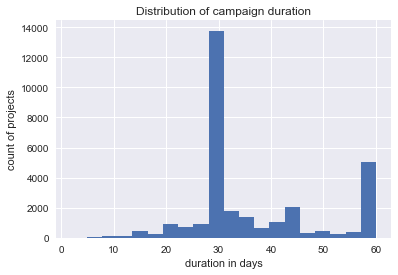

In [23]:
df['days_duration'].hist(bins=20)
#plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('duration in days')
plt.title('Distribution of campaign duration')

### Days running distribution

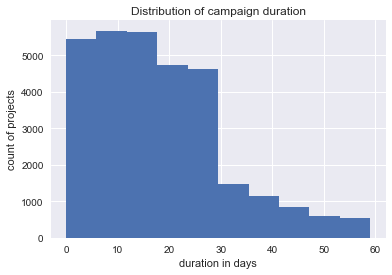

In [24]:
df['days_running'].hist(bins=10)
plt.ylabel('count of projects')
plt.xlabel('duration in days')
plt.title('Distribution of campaign duration')

### Days running / duration ratio

We will predict project success in 4 stages (4 separate predicting models):
* <0, 25) % of project duration,
* <25, 50) % of project duration,
* <50, 75) % of project duration,
* <75, 100) % of project duration,

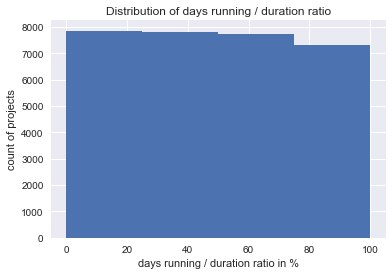

In [25]:
(100*df['days_running']/df['days_duration']).hist(bins=4)
plt.ylabel('count of projects')
plt.xlabel('days running / duration ratio in %')
plt.title('Distribution of days running / duration ratio')

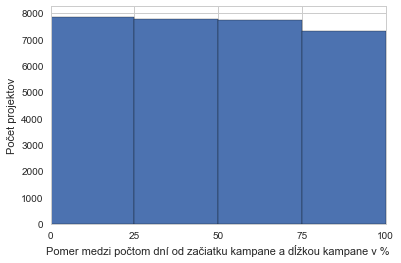

In [26]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(6,4))
(100*df['days_running']/df['days_duration']).hist(bins=4, ec='black')
plt.ylabel('Počet projektov')
plt.xlabel('Pomer medzi počtom dní od začiatku kampane a dĺžkou kampane v %')
#plt.title('Distribúcia pomeru medzi počtom dní od začiatku kampane a dĺžkou kampane v %')
plt.xlim((0,100))
plt.xticks([0,25,50,75,100])
plt.savefig('histogram_2.png', dpi=400)

### Goal distribution

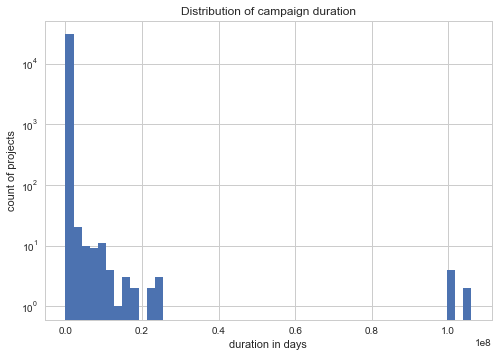

In [27]:
df['usd_goal'].hist(bins=50)
plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('duration in days')
plt.title('Distribution of campaign duration')

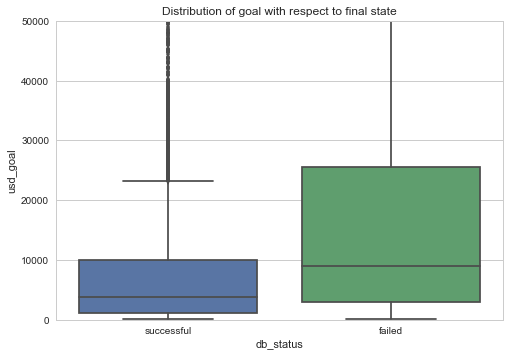

In [28]:
sns.boxplot(data=df, x='db_status', y='usd_goal')
#plt.yscale('log')
plt.ylim([-10, 50000])
plt.title('Distribution of goal with respect to final state')

### Final money pledged / goal ratio

Prediction classes  in %:

<0, 10)
<10, 100)
<100, 120)
<120, INF)

In [29]:
df['ratio_pledged_end_goal'].sort_values(ascending=False).head()

30448    37884.400000
24012    10667.585680
13403     9079.771784
13404     9079.771784
21380     8975.975976
Name: ratio_pledged_end_goal, dtype: float64

In [30]:
df[df['ratio_pledged_end_goal'] > 9000]['name']

13403                                 Nope 2.0 - Live Free
13404                                 Nope 2.0 - Live Free
24012    ZeTime: World's first smartwatch with hands ov...
30448                                Modern Map Art Prints
Name: name, dtype: object

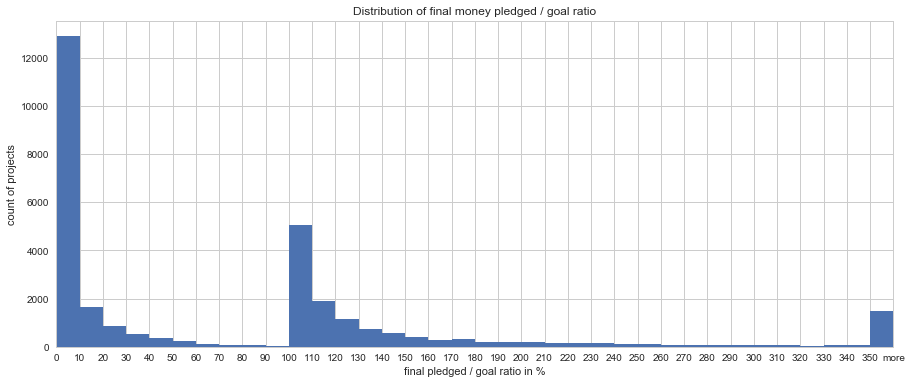

In [31]:
bins = np.arange(0,370,10)

fig, ax = plt.subplots(figsize=(15,6))
_, bins, patches = plt.hist(np.clip(df['ratio_pledged_end_goal'], bins[0], bins[-1]), bins=bins)

labels = [str(x) for x in np.arange(0,370,10)]
labels[-1] = 'more'

plt.xticks(np.arange(0,370,10), labels, rotation='horizontal')
plt.xlim([0, 360])
#plt.yscale('log')
plt.ylabel('count of projects')
plt.xlabel('final pledged / goal ratio in %')
plt.title('Distribution of final money pledged / goal ratio')

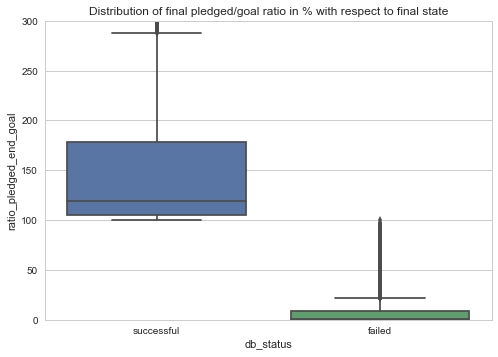

In [32]:
sns.boxplot(data=df, x='db_status', y='ratio_pledged_end_goal')
#plt.yscale('log')
plt.ylim([0, 300])
plt.title('Distribution of final pledged/goal ratio in % with respect to final state')

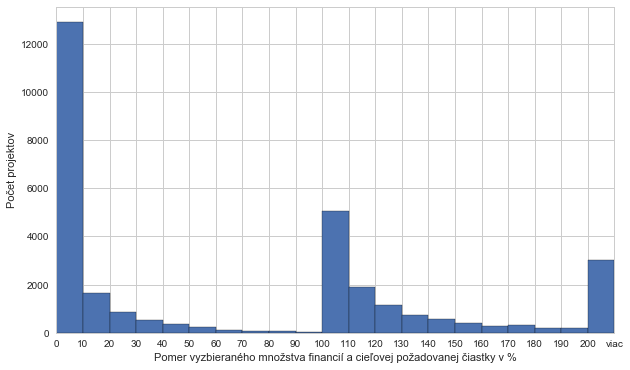

In [33]:
bins = np.arange(0,220,10)
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
_, bins, patches = plt.hist(np.clip(df['ratio_pledged_end_goal'], bins[0], bins[-1]), bins=bins, ec='black')

labels = [str(x) for x in np.arange(0,220,10)]
labels[-1] = 'viac'

plt.xticks(np.arange(0,220,10), labels, rotation='horizontal')
plt.xlim([0, 210])
plt.ylabel('Počet projektov')
plt.xlabel('Pomer vyzbieraného množstva financií a cieľovej požadovanej čiastky v %')
#plt.title('Distribúcia pomeru vyzbieraného množstva financií a cieľovej požadovanej čiastky v %')
plt.savefig('histogram_1.png', dpi=400)

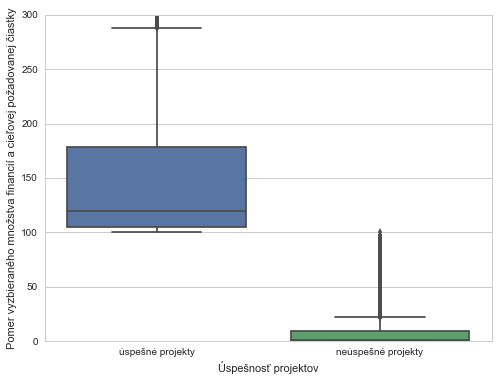

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set(style='whitegrid')
sns.boxplot(data=df, x='db_status', y='ratio_pledged_end_goal')
plt.xlabel('Úspešnosť projektov')
plt.ylabel('Pomer vyzbieraného množstva financií a cieľovej požadovanej čiastky')
plt.xticks([0,1],['úspešné projekty','neúspešné projekty'])
plt.ylim([0, 300])
#plt.title('Distribúcia pomeru vyzbieraného množstva financií a cieľovej požadovanej čiastky v % vzhľadom na úspešnosť projektov')
plt.savefig('boxplot_1.png', dpi=400)

In [35]:
df[df['state_end'] == 'failed']['ratio_pledged_end_goal'].describe()

count    16847.000000
mean         7.917617
std         14.583675
min          0.000000
25%          0.020000
50%          1.000000
75%          8.725809
max         99.997417
Name: ratio_pledged_end_goal, dtype: float64

In [36]:
df[df['state_end'] == 'successful']['ratio_pledged_end_goal'].describe()

count    13855.000000
mean       229.843097
std        547.876890
min        100.000000
25%        105.244000
50%        119.440500
75%        178.333333
max      37884.400000
Name: ratio_pledged_end_goal, dtype: float64

In [37]:
len(df[df['ratio_pledged_end_goal'] < 10])

12894

In [38]:
len(df[(df['ratio_pledged_end_goal'] >= 10) & (df['ratio_pledged_end_goal'] < 100)])

3953

In [39]:
len(df[(df['ratio_pledged_end_goal'] >= 100) & (df['ratio_pledged_end_goal'] < 120)])

6983

In [40]:
len(df[df['ratio_pledged_end_goal'] >= 120])

6872

## 0-25

In [41]:
len(df[df['ratio_running_duration'] < 25])

7860

Pearson correlation: 0.824


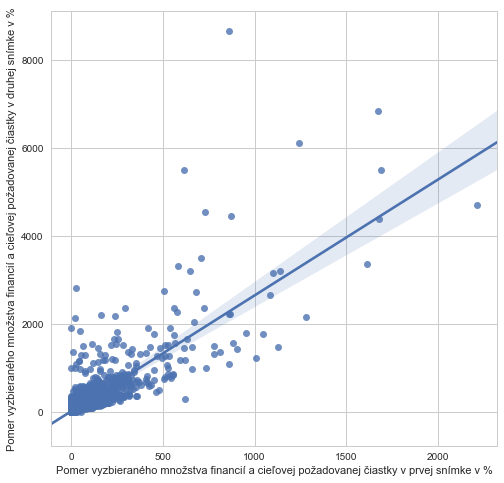

In [42]:
sns.set(style='whitegrid')
plt.subplots(figsize=(8,8))
sns.regplot(x="ratio_pledged_goal", y="ratio_pledged_end_goal", data=df[df['ratio_running_duration'] < 25])
print("Pearson correlation: %.3f" % df[df['ratio_running_duration'] < 25]['ratio_pledged_goal'].corr(df[df['ratio_running_duration'] < 25]['ratio_pledged_end_goal']))
#plt.xlim([0,9000])
#plt.ylim([0,11000])
plt.xlabel('Pomer vyzbieraného množstva financií a cieľovej požadovanej čiastky v prvej snímke v %')
plt.ylabel('Pomer vyzbieraného množstva financií a cieľovej požadovanej čiastky v druhej snímke v %')
#plt.title('Korelácia medzi pomermi vyzbieraného množstva financií a cieľovej požadovanej sumy jednotlivých snímok')
plt.savefig('corr_1.png', dpi=400)

## 25-50

In [43]:
len(df[(df['ratio_running_duration'] >= 25) & (df['ratio_running_duration'] < 50)])

7791

Pearson correlation: 0.933


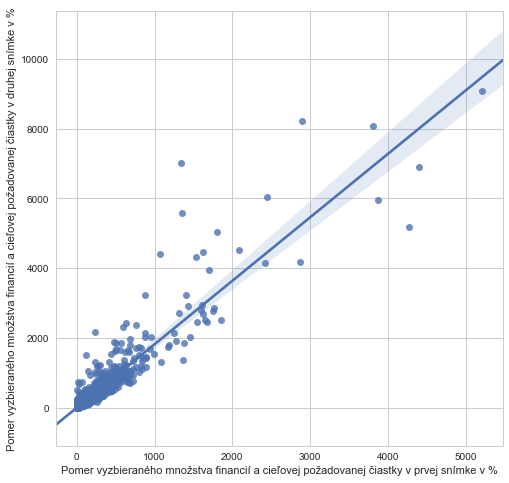

In [44]:
plt.subplots(figsize=(8,8))
sns.regplot(x="ratio_pledged_goal", y="ratio_pledged_end_goal", data=df[(df['ratio_running_duration'] >= 25) & (df['ratio_running_duration'] < 50)])
print("Pearson correlation: %.3f" % df[(df['ratio_running_duration'] >= 25) & (df['ratio_running_duration'] < 50)]['ratio_pledged_goal'].corr(df[(df['ratio_running_duration'] >= 25) & (df['ratio_running_duration'] < 50)]['ratio_pledged_end_goal']))
#plt.xlim([0,9000])
#plt.ylim([0,11000])
plt.xlabel('Pomer vyzbieraného množstva financií a cieľovej požadovanej čiastky v prvej snímke v %')
plt.ylabel('Pomer vyzbieraného množstva financií a cieľovej požadovanej čiastky v druhej snímke v %')
#plt.title('Korelácia medzi pomermi vyzbieraného množstva financií a cieľovej požadovanej sumy jednotlivých snímok')
plt.savefig('corr_1.png', dpi=400)

## 50-75

In [45]:
len(df[(df['ratio_running_duration'] >= 50) & (df['ratio_running_duration'] < 75)])

7742

Pearson correlation: 0.983


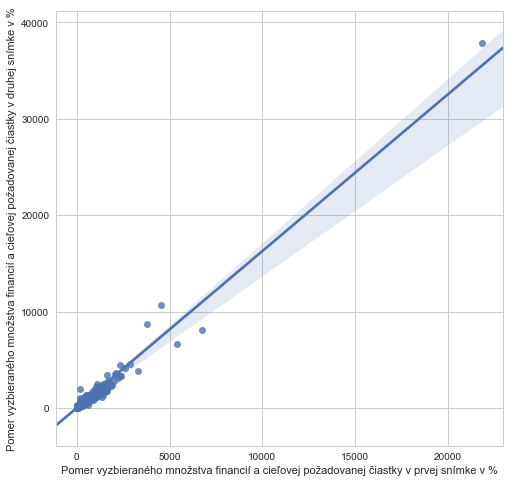

In [46]:
plt.subplots(figsize=(8,8))
sns.regplot(x="ratio_pledged_goal", y="ratio_pledged_end_goal", data=df[(df['ratio_running_duration'] >= 50) & (df['ratio_running_duration'] < 75)])
print("Pearson correlation: %.3f" % df[(df['ratio_running_duration'] >= 50) & (df['ratio_running_duration'] < 75)]['ratio_pledged_goal'].corr(df[(df['ratio_running_duration'] >= 50) & (df['ratio_running_duration'] < 75)]['ratio_pledged_end_goal']))
#plt.xlim([0,9000])
#plt.ylim([0,11000])
plt.xlabel('Pomer vyzbieraného množstva financií a cieľovej požadovanej čiastky v prvej snímke v %')
plt.ylabel('Pomer vyzbieraného množstva financií a cieľovej požadovanej čiastky v druhej snímke v %')
#plt.title('Korelácia medzi pomermi vyzbieraného množstva financií a cieľovej požadovanej sumy jednotlivých snímok')
plt.savefig('corr_1.png', dpi=400)

In [47]:
len(df[(df['ratio_running_duration'] >= 75) & (df['ratio_running_duration'] < 100)])

7113

Pearson correlation: 0.987


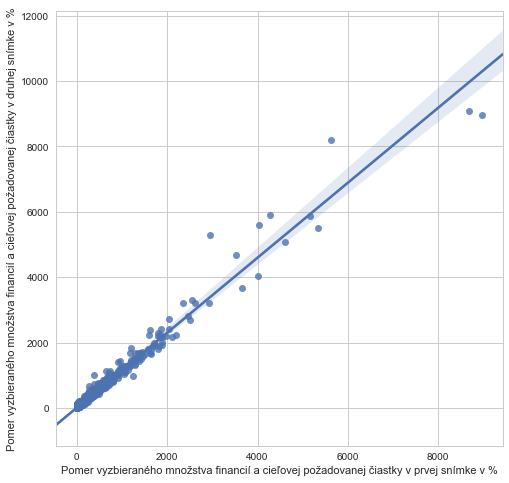

In [48]:
plt.subplots(figsize=(8,8))
sns.regplot(x="ratio_pledged_goal", y="ratio_pledged_end_goal", data=df[(df['ratio_running_duration'] >= 75) & (df['ratio_running_duration'] < 100)])
print("Pearson correlation: %.3f" % df[(df['ratio_running_duration'] >= 75) & (df['ratio_running_duration'] < 100)]['ratio_pledged_goal'].corr(df[(df['ratio_running_duration'] >= 75) & (df['ratio_running_duration'] < 100)]['ratio_pledged_end_goal']))
#plt.xlim([0,9000])
#plt.ylim([0,11000])
plt.xlabel('Pomer vyzbieraného množstva financií a cieľovej požadovanej čiastky v prvej snímke v %')
plt.ylabel('Pomer vyzbieraného množstva financií a cieľovej požadovanej čiastky v druhej snímke v %')
#plt.title('Korelácia medzi pomermi vyzbieraného množstva financií a cieľovej požadovanej sumy jednotlivých snímok')
plt.savefig('corr_1.png', dpi=400)

We expect the ratio_running_duration to be very usefull feature for prediction.


# How about lower intervals?
eg.
* <0, 5)
* <5, 10)
* <10, 15)

Predictions might be more accurate, but also less acurate as we would have less data for training.

In [49]:
len(df[(df['ratio_running_duration'] >= 0) & (df['ratio_running_duration'] < 5)])

2004

In [50]:
len(df[(df['ratio_running_duration'] >= 5) & (df['ratio_running_duration'] < 10)])

1235

In [51]:
len(df[(df['ratio_running_duration'] >= 10) & (df['ratio_running_duration'] < 15)])

1607

### Extract class labels

In [52]:
def get_class(ratio):
    if (ratio >= 120):
        return 4
    elif (ratio >= 100):
        return 3
    elif (ratio >= 10):
        return 2
    else:
        return 1

In [53]:
df['class'] = df['ratio_pledged_end_goal'].apply(get_class)
df['class'].value_counts()

1    12894
3     6983
4     6872
2     3953
Name: class, dtype: int64

In [54]:
df['ratio_running_duration'].describe()

count    30702.000000
mean        48.728617
std         28.916223
min          0.000000
25%         23.529412
50%         48.275862
75%         73.333333
max        100.000000
Name: ratio_running_duration, dtype: float64

### How many observations per class will there be for different intervals?

In [55]:
for x,y in zip([0,0,25,50,0,5,10], [100.1, 25,50,75,5,10,15]):
    print('Days running / Duration: <'+str(x)+'-'+str(y)+'):')
    print('total count: ',len(df[(df['ratio_running_duration'] >= x) & (df['ratio_running_duration'] < y)]['class']))
    print(df[(df['ratio_running_duration'] >= x) & (df['ratio_running_duration'] < y)]['class'].value_counts())
    print(df[(df['ratio_running_duration'] >= x) & (df['ratio_running_duration'] < y)]['class'].value_counts(normalize=True))
    print()

Days running / Duration: <0-100.1):
total count:  30702
1    12894
3     6983
4     6872
2     3953
Name: class, dtype: int64
1    0.419973
3    0.227444
4    0.223829
2    0.128754
Name: class, dtype: float64

Days running / Duration: <0-25):
total count:  7860
1    3278
3    1776
4    1765
2    1041
Name: class, dtype: int64
1    0.417048
3    0.225954
4    0.224555
2    0.132443
Name: class, dtype: float64

Days running / Duration: <25-50):
total count:  7791
1    3145
4    1863
3    1829
2     954
Name: class, dtype: int64
1    0.403671
4    0.239122
3    0.234758
2    0.122449
Name: class, dtype: float64

Days running / Duration: <50-75):
total count:  7742
1    3312
3    1742
4    1685
2    1003
Name: class, dtype: int64
1    0.427796
3    0.225006
4    0.217644
2    0.129553
Name: class, dtype: float64

Days running / Duration: <0-5):
total count:  2004
1    810
4    471
3    466
2    257
Name: class, dtype: int64
1    0.404192
4    0.235030
3    0.232535
2    0.128244
Name: cla

In [56]:
# class added

df.to_csv('data/merged.csv')

In [57]:
df.info(max_cols=105)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30702 entries, 0 to 31061
Data columns (total 103 columns):
average_pledge               30702 non-null float64
average_pledge_end           30702 non-null float64
backers_count                30702 non-null int64
backers_count_end            30702 non-null int64
blurb                        30702 non-null object
blurb_end                    30702 non-null object
category                     30702 non-null object
category_end                 30702 non-null object
category_name                30702 non-null object
category_name_end            30702 non-null object
category_parent              30702 non-null object
category_parent_end          30702 non-null object
category_position            30702 non-null int64
category_position_end        30702 non-null int64
country                      30702 non-null object
created_at                   30702 non-null int64
creator                      30702 non-null object
creator_end               

# Data integration (part 2)
Merging other tables from 2nd dataset - get aggregated values from FAQ, Updates and Comments

## FAQ

In [58]:
con = sql.connect(database='kickstarter2017', user='kickstarter', password='kickstarter')

In [59]:
df_faq = pd.read_sql('SELECT * FROM kickstarter2017.kickstarter_faq', con)
df_faq.head()

,faq_id,question,answer,time,project_id
0,1,How long will the podcast go on for?,<p>Till we run out of 90&#39;s and late 80&#39...,2014-07-15 14:37:00,11
1,2,What is the show format?,<p>Good Question! The format is casual review ...,2014-07-15 14:37:00,11
2,3,Are there any series that are not going to be ...,<p>One series that isn&#39;t going to be revie...,2014-07-15 14:37:00,11
3,4,Why no Daria and Anime?,<p>Daria isn&#39;t being reviewed on this show...,2014-07-15 14:37:00,11
4,5,When would shows release?,<p>LKKP shows will either be bi-weekly or mont...,2014-07-15 14:37:00,11


In [60]:
len(df_faq)

72343

In [61]:
df = pd.read_csv('data/merged.csv', encoding='latin1', index_col=0)

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
# we need unique identifier of observations
df['ID'] = df.index
df.rename_axis('ID', inplace=True).head(2)

,average_pledge,average_pledge_end,backers_count,backers_count_end,blurb,blurb_end,category,category_end,category_name,category_name_end,...,url_name,urls,urls_end,urls_url,urls_url_end,usd_goal,usd_pledged,usd_pledged_end,class,ID
ID,,,,,,,,,,,,,,,,,,,,,
0,57.818182,97.022989,22,87,Help SCDT fund their inaugural performance in ...,Help SCDT fund their inaugural performance in ...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",Performances,Performances,...,sac-contemporary-dance-theatres-performance-re...,"{""web"":{""project"":""https://www.kickstarter.com...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/projects/911926086...,https://www.kickstarter.com/projects/911926086...,8000,1272.0,8441.0,3,0
1,0.000000,0.000000,0,0,This is where inspired dancers from all ages g...,This is where inspired dancers from all ages g...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",Performances,Performances,...,all-style-dance-battle-the-streak,"{""web"":{""project"":""https://www.kickstarter.com...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/projects/122127184...,https://www.kickstarter.com/projects/122127184...,568,0.0,0.0,1,1


In [63]:
df_faq_merged = df.merge(df_faq, left_on='db_project_id', right_on='project_id', how='inner')
len(df_faq_merged)

21096

In [64]:
df_faq_merged.head(2)

,average_pledge,average_pledge_end,backers_count,backers_count_end,blurb,blurb_end,category,category_end,category_name,category_name_end,...,usd_goal,usd_pledged,usd_pledged_end,class,ID,faq_id,question,answer,time,project_id
0,10.000000,10.000000,1,1,"Need funds to buy materials, printing press, s...","Need funds to buy materials, printing press, s...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",Illustration,Illustration,...,10000,10.0,10.0,1,22,48723,What will I do with the money?,<p>There are two major devices I need for my f...,2015-10-05 12:10:40,68318
1,62.380952,77.541667,21,24,My capstone project for media studies at Pitze...,My capstone project for media studies at Pitze...,"{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",Installations,Installations,...,800,1310.0,1861.0,4,54,48775,Can I donate a different amount than in the re...,"<p>Yes, you can donate as much or as little as...",2015-10-12 14:50:50,68501


In [65]:
# convert unix timestamp to datetime of scraping
df_faq_merged['scraped_at_datetime'] = pd.to_datetime(df_faq_merged['scraped_at'], unit='s')
df_faq_merged[['scraped_at','scraped_at_datetime']].head(2)

,scraped_at,scraped_at_datetime
0,1446383344,2015-11-01 13:09:04
1,1446383344,2015-11-01 13:09:04


In [66]:
# filter only those faq that were added before datetime of scraping
df_faq_merged = df_faq_merged[df_faq_merged['scraped_at_datetime'] > df_faq_merged['time']]
len(df_faq_merged)

17385

In [67]:
# group by ID to get count of FAQ that were added before scraping
df_faq_merged = df_faq_merged[['faq_id','ID']].groupby('ID').count().rename(index=str, columns={'faq_id': 'faq_count_while_scraping'})
df_faq_merged.head()

,faq_count_while_scraping
ID,
22,1
54,1
95,2
99,3
100,1


In [68]:
df_faq_merged['ID'] = df_faq_merged.index.astype('int64')

In [69]:
# number of projects that had at least 1 FAQ at time of web scraping
len(df_faq_merged)

3638

In [70]:
# add faq_count to df with observations
df = df.merge(df_faq_merged, how='left', on='ID')

In [71]:
df['faq_count_while_scraping'] = df['faq_count_while_scraping'].fillna(0)

In [72]:
df['faq_count_while_scraping'].describe()

count    30702.000000
mean         0.566250
std          2.577895
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        120.000000
Name: faq_count_while_scraping, dtype: float64

In [73]:
df[df['faq_count_while_scraping'] == 120]['url_name']

24297    kniterate-the-digital-knitting-machine
Name: url_name, dtype: object

(-1, 1)

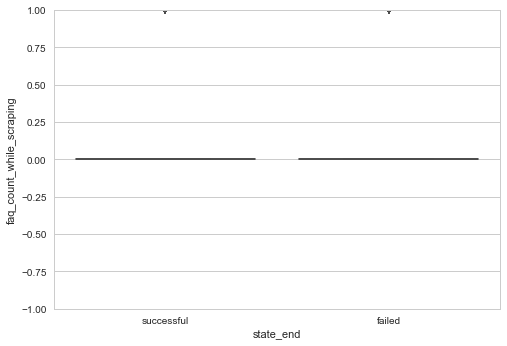

In [74]:
sns.boxplot(data=df, x='state_end', y='faq_count_while_scraping')
plt.ylim([-1, 1])

In [75]:
df.to_csv('data/merged2.csv')

## Comments

In [76]:
con = sql.connect(database='kickstarter2017', user='kickstarter', password='kickstarter')

In [77]:
df_comm = pd.read_sql('SELECT time, author_is_creator, project_id FROM kickstarter2017.kickstarter_comment', con)
df_comm.head()

,time,author_is_creator,project_id
0,2017-11-01 02:45:26,0,2
1,2017-11-01 01:20:01,0,2
2,2017-10-31 22:04:12,0,2
3,2017-10-31 20:57:47,0,2
4,2017-10-31 11:37:46,0,2


In [78]:
len(df_comm)

2289836

In [79]:
df = pd.read_csv('data/merged2.csv', encoding='latin1', index_col=0)

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
df_comm_merged = df.merge(df_comm, left_on='db_project_id', right_on='project_id', how='inner')
len(df_comm_merged)

744155

In [81]:
# convert unix timestamp to datetime of scraping
df_comm_merged['scraped_at_datetime'] = pd.to_datetime(df_comm_merged['scraped_at'], unit='s')

In [82]:
df_comm_merged = df_comm_merged[df_comm_merged['scraped_at_datetime'] > df_comm_merged['time']]
len(df_comm_merged)

161242

In [83]:
df_comm_merged_creator = df_comm_merged[df_comm_merged['author_is_creator'] == 1]
len(df_comm_merged_creator)

45828

In [84]:
df_comm_merged_public = df_comm_merged[df_comm_merged['author_is_creator'] == 0]
len(df_comm_merged_public)

115414

In [85]:
# group by ID to get count of comments made by creator that were added before scraping
df_comm_merged_creator = df_comm_merged_creator[['author_is_creator','ID']].groupby('ID').count().rename(index=str, columns={'author_is_creator': 'comments_count_creator_while_scraping'})
df_comm_merged_creator.head()

,comments_count_creator_while_scraping
ID,
53,2
99,1
105,1
122,1
130,1


In [86]:
# group by ID to get count of comments made by public that were added before scraping
df_comm_merged_public = df_comm_merged_public[['author_is_creator','ID']].groupby('ID').count().rename(index=str, columns={'author_is_creator': 'comments_count_public_while_scraping'})
df_comm_merged_public.head()

,comments_count_public_while_scraping
ID,
12,1
26,1
53,2
58,1
63,1


In [87]:
# number of projects that had at least 1 comment by creator at time of web scraping
len(df_comm_merged_creator)

4938

In [88]:
# number of projects that had at least 1 comment by public at time of web scraping
len(df_comm_merged_public)

8283

In [89]:
# ids to join main df
df_comm_merged_creator['ID'] = df_comm_merged_creator.index.astype('int64')
df_comm_merged_public['ID'] = df_comm_merged_public.index.astype('int64')

In [90]:
# add both counts to df with observations
df = df.merge(df_comm_merged_creator, how='left', on='ID')
df = df.merge(df_comm_merged_public, how='left', on='ID')

In [91]:
df['comments_count_creator_while_scraping'] = df['comments_count_creator_while_scraping'].fillna(0)
df['comments_count_public_while_scraping'] = df['comments_count_public_while_scraping'].fillna(0)

In [92]:
df[['comments_count_creator_while_scraping', 'comments_count_public_while_scraping']].describe()

,comments_count_creator_while_scraping,comments_count_public_while_scraping
count,30702.000000,30702.000000
mean,1.492671,3.759169
std,12.045863,42.753896
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,916.000000,4142.000000


Pearson correlation: 0.813


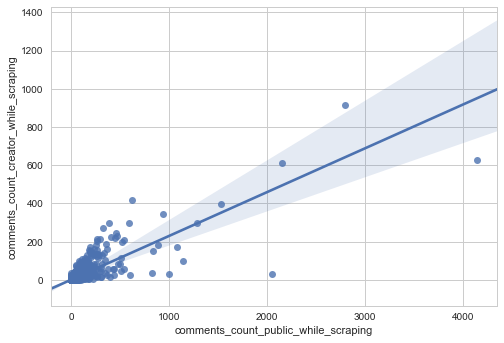

In [93]:
sns.regplot(x="comments_count_public_while_scraping", y="comments_count_creator_while_scraping", data=df)
print("Pearson correlation: %.3f" % df['comments_count_public_while_scraping'].corr(df['comments_count_creator_while_scraping']))

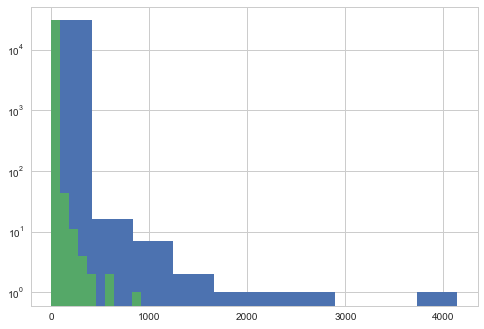

In [94]:
df['comments_count_public_while_scraping'].hist(bins=10)
df['comments_count_creator_while_scraping'].hist(bins=10)
plt.yscale('log')

(-1, 10)

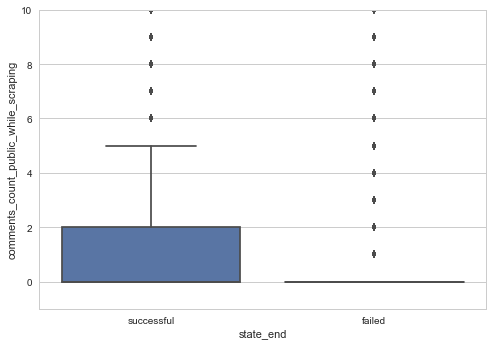

In [95]:
sns.boxplot(data=df, x='state_end', y='comments_count_public_while_scraping')
plt.ylim([-1, 10])

(-1, 10)

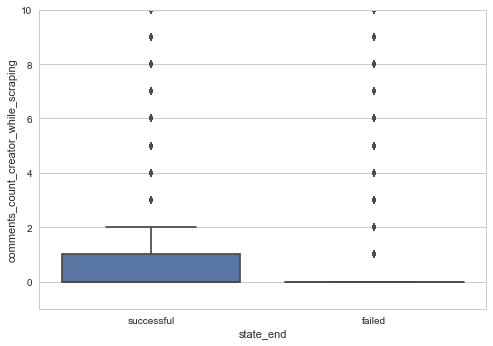

In [96]:
sns.boxplot(data=df, x='state_end', y='comments_count_creator_while_scraping')
plt.ylim([-1, 10])

In [97]:
df.to_csv('data/merged3.csv')

## Updates

In [98]:
con = sql.connect(database='kickstarter2017', user='kickstarter', password='kickstarter')

In [99]:
df_updates = pd.read_sql('SELECT time, likes, project_id FROM kickstarter2017.kickstarter_update', con)
df_updates.head()

,time,likes,project_id
0,2017-10-31 04:18:31,14,3
1,2017-09-20 02:51:48,0,6
2,2010-05-31 14:51:55,0,7
3,2010-05-26 08:54:30,0,7
4,2010-05-24 23:21:42,0,7


In [100]:
len(df_updates)

599727

In [101]:
df = pd.read_csv('data/merged3.csv', encoding='latin1', index_col=0)

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
df_updates_merged = df.merge(df_updates, left_on='db_project_id', right_on='project_id', how='inner')
len(df_updates_merged)

155910

In [103]:
# convert unix timestamp to datetime of scraping
df_updates_merged['scraped_at_datetime'] = pd.to_datetime(df_updates_merged['scraped_at'], unit='s')

In [104]:
df_updates_merged = df_updates_merged[df_updates_merged['scraped_at_datetime'] > df_updates_merged['time']]
len(df_updates_merged)

45023

In [105]:
# group by ID to get count of updates that were added before scraping
# and statistics of likes per project
df_updates_merged_count = df_updates_merged[['likes','ID']].groupby('ID').count().rename(index=str, columns={'likes': 'updates_count_while_scraping'})
df_updates_merged_likes_sum = df_updates_merged[['likes','ID']].groupby('ID').sum().rename(index=str, columns={'likes': 'updates_likes_sum_while_scraping'})
df_updates_merged_likes_mean = df_updates_merged[['likes','ID']].groupby('ID').mean().rename(index=str, columns={'likes': 'updates_likes_mean_while_scraping'})
df_updates_merged_likes_min = df_updates_merged[['likes','ID']].groupby('ID').min().rename(index=str, columns={'likes': 'updates_likes_min_while_scraping'})
df_updates_merged_likes_max = df_updates_merged[['likes','ID']].groupby('ID').max().rename(index=str, columns={'likes': 'updates_likes_max_while_scraping'})
df_updates_merged_likes_median = df_updates_merged[['likes','ID']].groupby('ID').median().rename(index=str, columns={'likes': 'updates_likes_median_while_scraping'})

In [106]:
# number of projects that had at least 1 update at time of web scraping
len(df_updates_merged_count)

13742

In [107]:
df_updates_merged_count['ID'] = df_updates_merged_count.index.astype('int64')
df_updates_merged_likes_sum['ID'] = df_updates_merged_likes_sum.index.astype('int64')
df_updates_merged_likes_mean['ID'] = df_updates_merged_likes_mean.index.astype('int64')
df_updates_merged_likes_min['ID'] = df_updates_merged_likes_min.index.astype('int64')
df_updates_merged_likes_max['ID'] = df_updates_merged_likes_max.index.astype('int64')
df_updates_merged_likes_median['ID'] = df_updates_merged_likes_median.index.astype('int64')

In [108]:
# add all to df 
df = df.merge(df_updates_merged_count, how='left', on='ID')
df = df.merge(df_updates_merged_likes_sum, how='left', on='ID')
df = df.merge(df_updates_merged_likes_mean, how='left', on='ID')
df = df.merge(df_updates_merged_likes_min, how='left', on='ID')
df = df.merge(df_updates_merged_likes_max, how='left', on='ID')
df = df.merge(df_updates_merged_likes_median, how='left', on='ID')

In [109]:
df['updates_count_while_scraping'] = df['updates_count_while_scraping'].fillna(0)
df['updates_likes_sum_while_scraping'] = df['updates_likes_sum_while_scraping'].fillna(0)
df['updates_likes_mean_while_scraping'] = df['updates_likes_mean_while_scraping'].fillna(0)
df['updates_likes_min_while_scraping'] = df['updates_likes_min_while_scraping'].fillna(0)
df['updates_likes_max_while_scraping'] = df['updates_likes_max_while_scraping'].fillna(0)
df['updates_likes_median_while_scraping'] = df['updates_likes_median_while_scraping'].fillna(0)

In [110]:
df[['updates_count_while_scraping', 'updates_likes_sum_while_scraping', 'updates_likes_mean_while_scraping', 'updates_likes_min_while_scraping', 'updates_likes_max_while_scraping', 'updates_likes_median_while_scraping']].describe()

,updates_count_while_scraping,updates_likes_sum_while_scraping,updates_likes_mean_while_scraping,updates_likes_min_while_scraping,updates_likes_max_while_scraping,updates_likes_median_while_scraping
count,30702.000000,30702.000000,30702.000000,30702.000000,30702.000000,30702.000000
mean,1.466452,4.634030,1.139718,0.692430,1.763045,1.077861
std,2.801007,23.544444,3.907283,2.680618,6.683536,3.687957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,64.000000,1269.000000,184.000000,182.000000,290.000000,184.000000


In [111]:
df.to_csv('data/merged4.csv')

Pearson correlation: 0.271


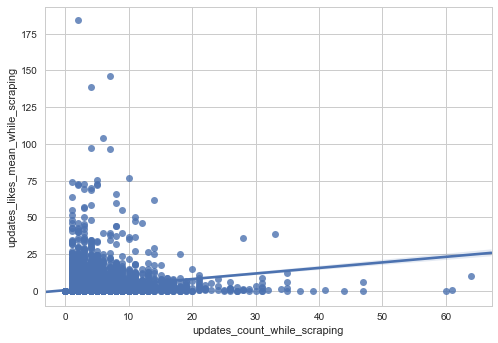

In [112]:
sns.regplot(x="updates_count_while_scraping", y="updates_likes_mean_while_scraping", data=df)
print("Pearson correlation: %.3f" % df['updates_count_while_scraping'].corr(df['updates_likes_mean_while_scraping']))

# Exploratory data analysis (part 2)

In [113]:
plt.rcParams['figure.figsize'] = [16, 6]

## Currency

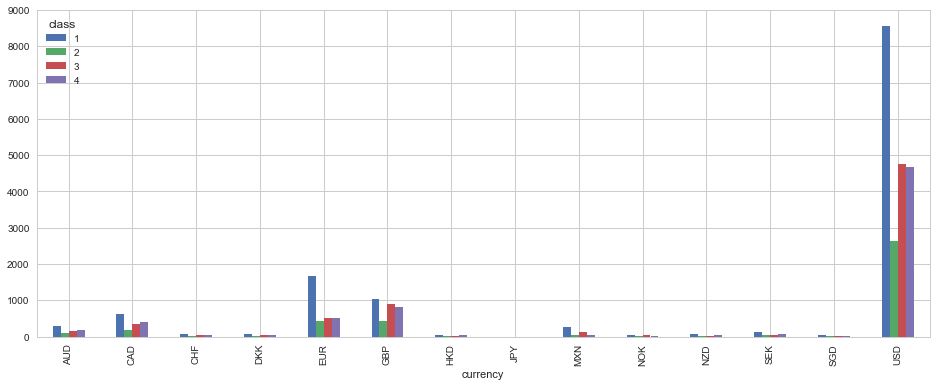

In [114]:
pd.crosstab(index=df["currency"], columns=df['class']).plot.bar(stacked=False)

## Country

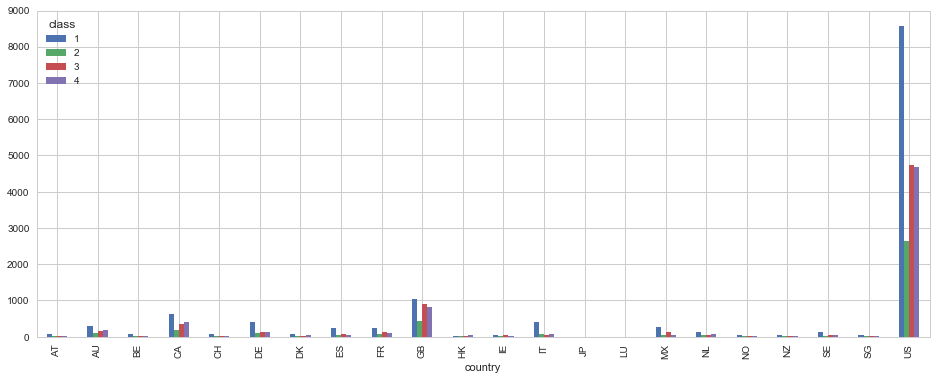

In [115]:
pd.crosstab(index=df["country"], columns=df['class']).plot.bar(stacked=False)

## Location type

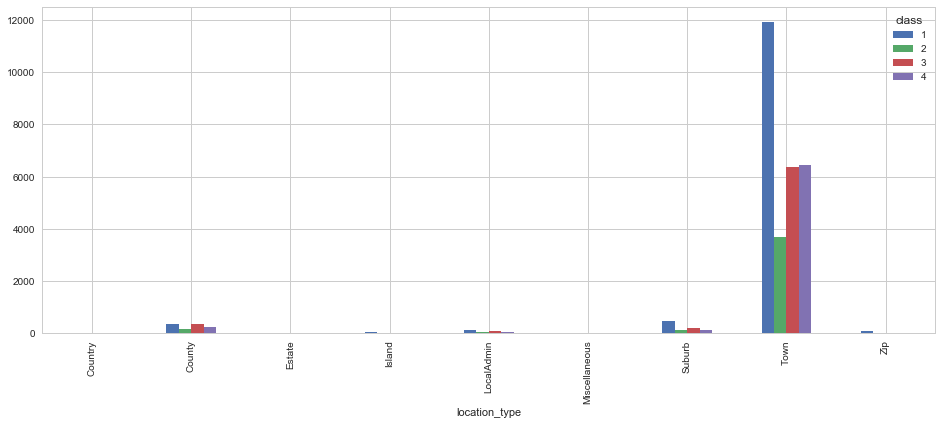

In [116]:
pd.crosstab(index=df["location_type"], columns=df['class']).plot.bar(stacked=False)

## Parent category

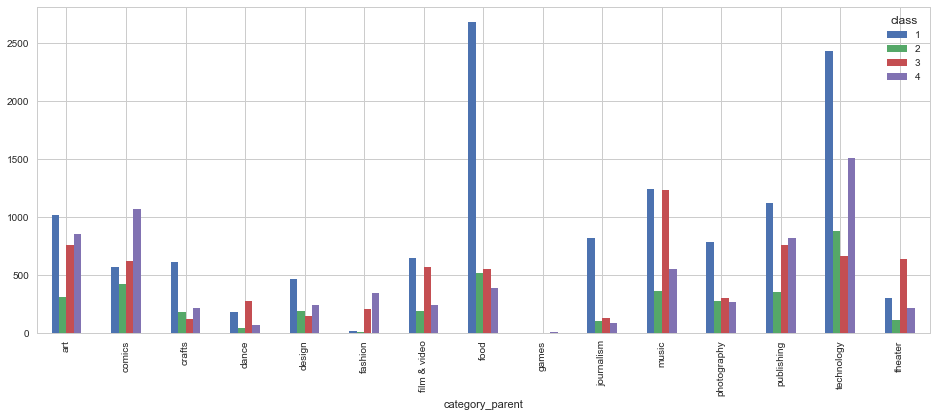

In [117]:
pd.crosstab(index=df["category_parent"], columns=df['class']).plot.bar(stacked=False)

## Category

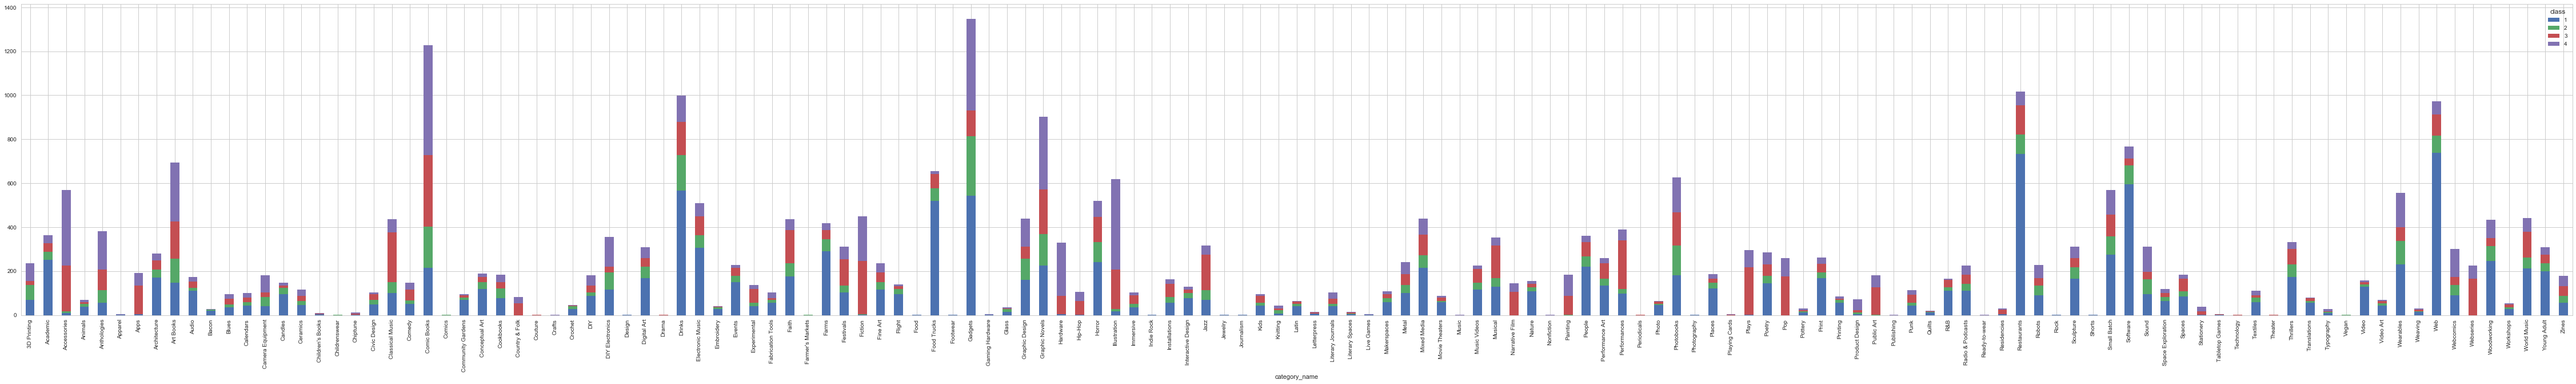

In [118]:
# too many values
plt.rcParams['figure.figsize'] = [80, 10]
pd.crosstab(index=df["category_name"], columns=df['class']).plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [16, 6]

## Staff pick

In [119]:
# in past there were no staff_pick badges so we set them to False
df['staff_pick'] = df['staff_pick'].fillna(False)

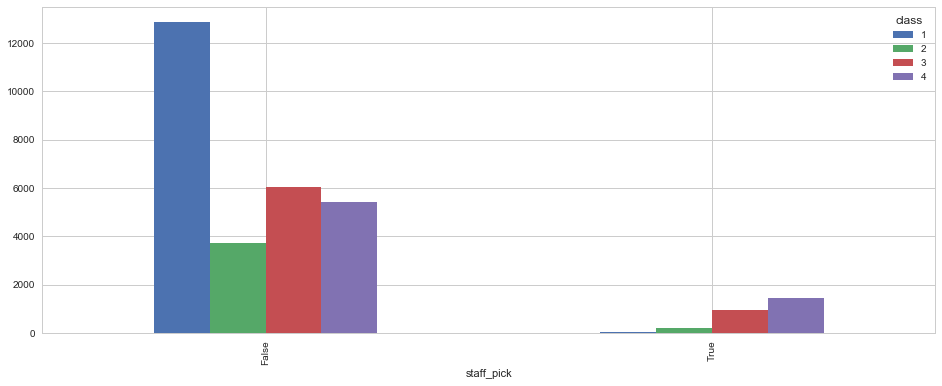

In [120]:
pd.crosstab(index=df["staff_pick"], columns=df['class']).plot.bar(stacked=False)

In [121]:
df.to_csv('data/merged4.csv')

In [122]:
df.isnull().sum()[df.isnull().sum() > 0]

creator_name               1
creator_name_end           1
db_description_full       11
db_image_url            9288
db_project_data          102
db_start_time          16847
db_video_url           10259
location_state             7
location_state_end         6
staff_pick_end          1776
dtype: int64